<a href="https://colab.research.google.com/github/abn15/E-health-monitoring-system/blob/main/dwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install PyWavelets


In [ ]:
import pandas as pd
import numpy as np
import pywt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the XLSX file
df = pd.read_excel('/content/drive/MyDrive/epoched_files/ai_preprocess_h01.xlsx_interval_1.xlsx')

# Print the column names
print(df.columns)


Index(['Time Interval', 'Preprocessed data of channel 1',
       'Preprocessed data of channel 2', 'Preprocessed data of channel 3',
       'Preprocessed data of channel 4', 'Preprocessed data of channel 5',
       'Preprocessed data of channel 6', 'Preprocessed data of channel 7',
       'Preprocessed data of channel 8', 'Preprocessed data of channel 9',
       'Preprocessed data of channel 10', 'Preprocessed data of channel 11',
       'Preprocessed data of channel 12', 'Preprocessed data of channel 13',
       'Preprocessed data of channel 14', 'Preprocessed data of channel 15',
       'Preprocessed data of channel 16', 'Preprocessed data of channel 17',
       'Preprocessed data of channel 18', 'Preprocessed data of channel 19'],
      dtype='object')


In [ ]:
# Load the XLSX file
df = pd.read_excel('/content/drive/MyDrive/pre-processed_files/ai_preprocess_h01.xlsx')

# Extract the desired time range
epoch_data = df[(df['Time Interval'] >= start_time) & (df['Time Interval'] <= end_time)]

# Select the columns containing preprocessed data
preprocessed_columns = [f'Preprocessed data of channel {i}' for i in range(1, 20)]

# Perform DWT on the epoch data for each channel
wavelet = 'db4'  # Choose the desired wavelet
coeffs = {}
for col in preprocessed_columns:
    channel_data = epoch_data[col]
    channel_coeffs = pywt.wavedec(channel_data, wavelet)
    coeffs[col] = channel_coeffs





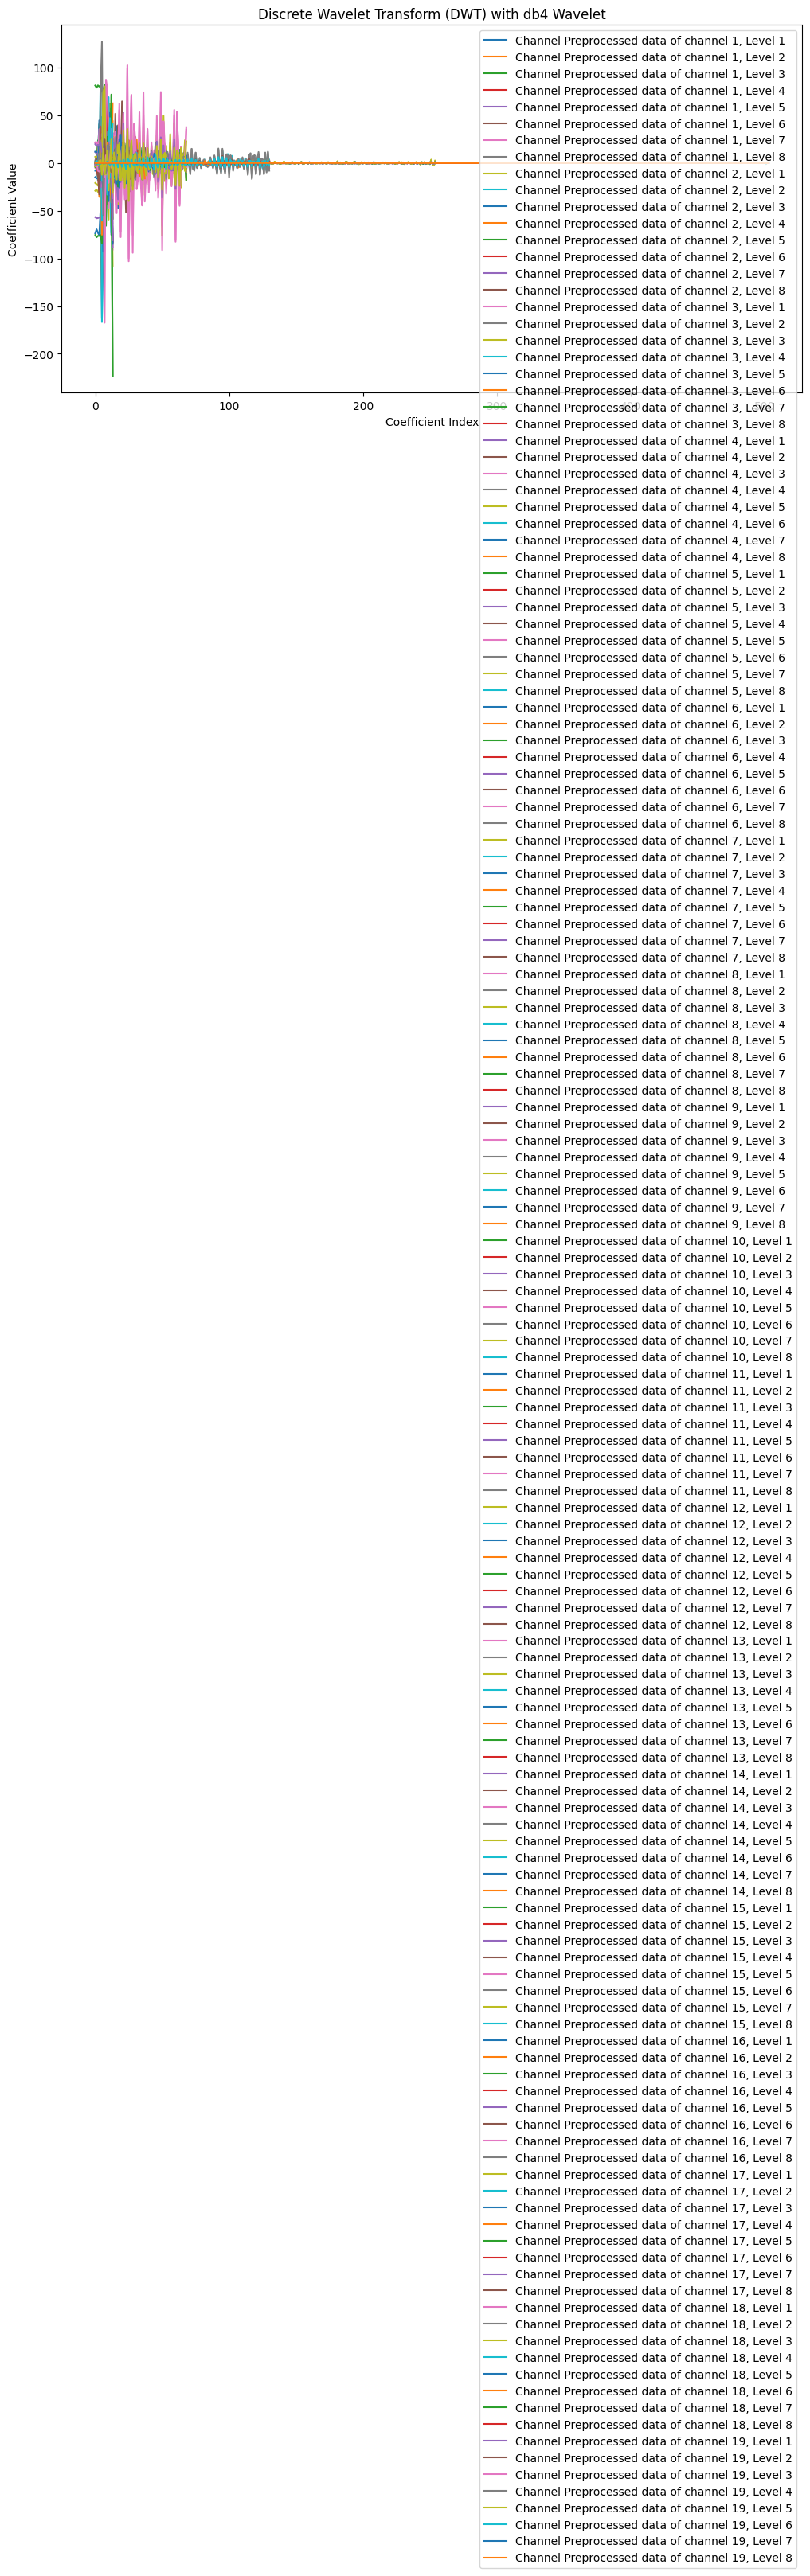

In [ ]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt

# Load the XLSX file
df = pd.read_excel('/content/drive/MyDrive/epoched_files/ai_preprocess_h01.xlsx_interval_1.xlsx')

# Set the desired time period (0-4 in this example)
start_time = 0
end_time = 4

# Extract the desired time range
epoch_data = df[(df['Time Interval'] >= start_time) & (df['Time Interval'] <= end_time)]

# Select the columns containing preprocessed data
preprocessed_columns = [f'Preprocessed data of channel {i}' for i in range(1, 20)]

# Choose the wavelet
wavelet = 'db4'

# Perform DWT on the epoch data for each channel
coeffs = {}
for col in preprocessed_columns:
    channel_data = epoch_data[col]
    channel_coeffs = pywt.wavedec(channel_data, wavelet)
    coeffs[col] = channel_coeffs

# Plot the DWT coefficients
plt.figure(figsize=(12, 6))
for col, channel_coeffs in coeffs.items():
    for i, coeffs_level in enumerate(channel_coeffs):
        plt.plot(coeffs_level, label=f'Channel {col}, Level {i+1}')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title(f'Discrete Wavelet Transform (DWT) with {wavelet} Wavelet')
plt.legend()
plt.show()


~END


In [ ]:
import pandas as pd

# Load the first XLSX file
file1 = pd.read_excel('/content/wavelet_coeffs.csv')

# Load the second XLSX file
file2 = pd.read_excel('/content/wavelet_coeffss.csv')

# Compare the contents of the two files
if file1.equals(file2):
    print("The XLSX files are identical.")
else:
    print("The XLSX files are not identical.")


ValueError: ignored